## solution has been separated into three worksheets(notebook).
* classification for Status 12
* classification for Status 24
* Visualization and data distribution

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/root/anaconda3/envs/shopin/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


# static data

In [3]:
stat_data=pd.read_excel('./Case-Study 1 Dataset.xlsx',sheet_name='Static Data',date_parser=True,na_values=['NA',' -   ',' NA '])

stat_data.head()

,Year,LoanID,Original Loan Size,Origination Date,Original Term,APR,Loan Rate,LTV,Monthly Instalment,Type 1,Type 2,Borrower's Employment Status,Risk Tier,Exposure At Default,Further Recovery Expected Y/N,Recoveries @ 6m,Recoveries @ 9m,Recoveries @ 12m,Total Recovery,Prepayment Amount
0,2014,1,7190.857680,2014-11-27,51,0.314541,0.250981,1.014118,207.08,A,A,Employed,Tier 4,NaN,NaN,NaN,NaN,NaN,NaN,0.00
1,2014,2,6591.348706,2014-12-03,34,0.205522,0.231402,0.813309,212.91,B,A,Self-employed,Tier 2,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,2014,3,6406.531360,2014-12-16,64,0.302483,0.285036,0.960000,191.25,B,B,Employed,Tier 5,NaN,NaN,NaN,NaN,NaN,NaN,4574.86
3,2014,4,3599.468553,2014-12-17,45,0.319664,0.244781,0.890000,119.15,A,B,Employed,Tier 5,NaN,NaN,NaN,NaN,NaN,NaN,0.00
4,2014,5,6995.988821,2014-12-18,43,0.316048,0.324810,0.730978,233.87,B,B,Employed,Tier 5,NaN,NaN,NaN,NaN,NaN,NaN,0.00


# performance data
<b>`agg_col`</b>:
    this is the aggregated column that has been made by taking mode across all the months for a given loanID

In [4]:
per_data=pd.read_csv('./agg_performance.csv',na_values=['#NA'])
per_data.head()

,LoanID,Status 12,Status 24,Agg_col
0,1,NaN,NaN,0.0
1,2,0.0,0.0,0.0
2,3,0.0,0.0,0.0
3,4,0.0,0.0,0.0
4,5,0.0,0.0,0.0


In [155]:
main_data=pd.concat(objs=[stat_data,per_data],axis=1)
main_data=main_data.loc[:,~main_data.columns.duplicated()]
main_data=main_data.rename(columns={"Borrower's Employment Status":'Borrower employement status'})
main_data.columns

Index(['Year', 'LoanID', 'Original Loan Size', 'Origination Date',
       'Original Term', 'APR', 'Loan Rate', 'LTV', 'Monthly Instalment',
       'Type 1', 'Type 2', 'Borrower employement status', 'Risk Tier',
       'Exposure At Default', 'Further Recovery Expected Y/N',
       'Recoveries @ 6m', 'Recoveries @ 9m', 'Recoveries @ 12m',
       'Total Recovery', 'Prepayment Amount', 'Status 12', 'Status 24',
       'Agg_col'],
      dtype='object')

In [173]:
main_data['Status 12'].value_counts()
main_data['Status 24'].value_counts()

0.0    11102
1.0     1024
Name: Status 24, dtype: int64

# outlier clipping: 
For all numerical column i am clipping otliers by 99 percentile. 

In [157]:
val_col=[ 'Original Loan Size', 'Original Term', 'APR',
       'Loan Rate', 'LTV', 'Monthly Instalment']

for col in val_col:
    val=main_data[col].quantile([0.99]).as_matrix()[0]
    main_data[col]=[val if i>val else i for i in main_data[col]]

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


In [176]:
train_data=main_data[main_data['Status 24'].notnull()]

In [177]:
def_1=train_data[train_data['Status 24']==1]
def_2=train_data[train_data['Status 24']==0].sample(1200)
train_data=pd.concat(objs=[def_1,def_2])
train_data['Status 24'].value_counts()

0.0    1200
1.0    1024
Name: Status 24, dtype: int64

# Label encoding:
Here i am creating dummy variables for categorical columns. 

In [178]:
train_data=train_data.join(pd.get_dummies(train_data[['Type 1','Type 2','Borrower employement status', 'Risk Tier']]))
train_data.columns

Index(['Year', 'LoanID', 'Original Loan Size', 'Origination Date',
       'Original Term', 'APR', 'Loan Rate', 'LTV', 'Monthly Instalment',
       'Type 1', 'Type 2', 'Borrower employement status', 'Risk Tier',
       'Exposure At Default', 'Further Recovery Expected Y/N',
       'Recoveries @ 6m', 'Recoveries @ 9m', 'Recoveries @ 12m',
       'Total Recovery', 'Prepayment Amount', 'Status 12', 'Status 24',
       'Agg_col', 'Type 1_A', 'Type 1_B', 'Type 1_C', 'Type 2_A', 'Type 2_B',
       'Type 2_C', 'Borrower employement status_Employed',
       'Borrower employement status_Other',
       'Borrower employement status_Self-employed', 'Risk Tier_Tier 1',
       'Risk Tier_Tier 2', 'Risk Tier_Tier 3', 'Risk Tier_Tier 4',
       'Risk Tier_Tier 5', 'Risk Tier_Tier 6', 'Risk Tier_Tier 7',
       'Risk Tier_Tier 8', 'Risk Tier_Untiered'],
      dtype='object')

In [186]:
train_num_col=[ 
       'Original Term', 'APR',  'LTV', 'Monthly Instalment',
       'Agg_col', 
        'Type 1_A', 'Type 1_B', 'Type 1_C', 'Type 2_A',
       'Type 2_B', 'Type 2_C', 'Borrower employement status_Employed',
       'Borrower employement status_Other',
       'Borrower employement status_Self-employed', 'Risk Tier_Tier 1',
       'Risk Tier_Tier 2', 'Risk Tier_Tier 3', 'Risk Tier_Tier 4',
       'Risk Tier_Tier 5', 'Risk Tier_Tier 6', 'Risk Tier_Tier 7',
       'Risk Tier_Tier 8', 'Risk Tier_Untiered']

In [187]:
import sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data[train_num_col], train_data['Status 24'], test_size=0.2, stratify= train_data['Status 24'],random_state=42)

# Random forest classifier

In [188]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_jobs=6, random_state=1, min_samples_leaf=5)
clf.fit(X_train,y_train)

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=6,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [189]:
y_pred=clf.predict(X_test)

Confusion matrix
[[232   8]
 [ 56 149]]


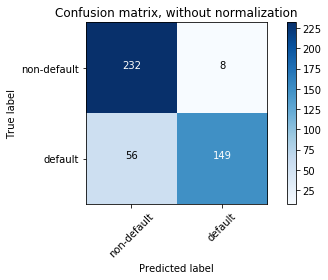

In [190]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non-default','default'],
                      title='Confusion matrix, without normalization')


In [191]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8056    0.9667    0.8788       240
         1.0     0.9490    0.7268    0.8232       205

   micro avg     0.8562    0.8562    0.8562       445
   macro avg     0.8773    0.8467    0.8510       445
weighted avg     0.8717    0.8562    0.8532       445



In [185]:
var_dict=dict(zip(X_train.columns,clf.feature_importances_))
var_dict_sorted=sorted(var_dict.items(), key=lambda kv: kv[1],reverse=True)

for i,j in var_dict_sorted[0:10]:
    print('variable is {} and feature importance is {}'.format(i,j))

variable is Agg_col and feature importance is 0.55089872325079
variable is Loan Rate and feature importance is 0.08310475038446469
variable is LTV and feature importance is 0.06157674315239196
variable is Monthly Instalment and feature importance is 0.06123878973601612
variable is APR and feature importance is 0.060010199277107955
variable is Original Loan Size and feature importance is 0.05593437721128226
variable is Original Term and feature importance is 0.04546464349760537
variable is Risk Tier_Tier 3 and feature importance is 0.01584164689204977
variable is Risk Tier_Tier 4 and feature importance is 0.011975748502584302
variable is Risk Tier_Tier 7 and feature importance is 0.007420746570373305


# classification with logistic regression

In [192]:
num_col=[ 'Original Term', 'APR',  'LTV', 'Monthly Instalment', 'Agg_col']
cat_col=[ 'Type 1_A', 'Type 1_B', 'Type 1_C', 'Type 2_A', 'Type 2_B', 'Type 2_C', 'Borrower employement status_Employed', 'Borrower employement status_Other', 'Borrower employement status_Self-employed', 'Risk Tier_Tier 1', 'Risk Tier_Tier 2', 'Risk Tier_Tier 3', 'Risk Tier_Tier 4', 'Risk Tier_Tier 5', 'Risk Tier_Tier 6', 'Risk Tier_Tier 7', 'Risk Tier_Tier 8', 'Risk Tier_Untiered']

# variable scaling

In [193]:
from sklearn import preprocessing
scaled_data=preprocessing.scale(train_data[num_col])

scale_train_data=pd.DataFrame(np.append(pd.DataFrame(scaled_data,columns=num_col),train_data[cat_col],axis=1))

In [194]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scale_train_data, train_data['Status 24'], test_size=0.2, stratify= train_data['Status 12'],random_state=42)

In [195]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                          ).fit(X_train, y_train)
y_pred=clf.predict(X_test)

Confusion matrix
[[249   4]
 [ 46 146]]


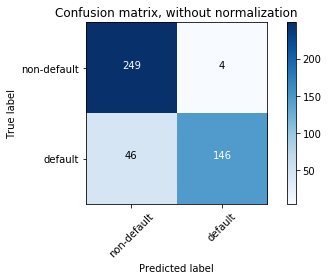

In [196]:
import numpy as np
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['non-default','default'],
                      title='Confusion matrix, without normalization')

In [197]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

         0.0     0.8441    0.9842    0.9088       253
         1.0     0.9733    0.7604    0.8538       192

   micro avg     0.8876    0.8876    0.8876       445
   macro avg     0.9087    0.8723    0.8813       445
weighted avg     0.8998    0.8876    0.8850       445



# Training of Multiple layer perceptron

# Target label encoding

In [172]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data['Status 24'])
y_label=le.transform(train_data['Status 24'])
y_label

from sklearn.preprocessing import OneHotEncoder
import numpy as np
y_encoded=np.array(y_label).reshape(len(train_data),1)
one_enc=OneHotEncoder(sparse=False)
y_encoded=one_enc.fit_transform(y_encoded)
y_encoded

/root/anaconda3/envs/shopin/lib/python3.5/site-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [78]:
import sklearn

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data[train_num_col], y_encoded, test_size=0.2, stratify= y_encoded,random_state=42)

# Training MLP

In [79]:
from sklearn.feature_extraction.text import CountVectorizer
import keras
from keras.layers import merge, Input,InputLayer
from keras.engine import InputLayer
from keras.layers import Dense, Activation, Flatten,Dropout,MaxPool2D,MaxPool1D
from keras.layers.core import Activation, Dense, Flatten
from keras.models import Sequential
from keras.layers import Dense
from keras.layers.normalization import BatchNormalization

model = Sequential()
model.add(Dense(32,input_dim=25,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 32)                832       
_________________________________________________________________
dense_49 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_50 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_19 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_20 (Dropout)         (None, 128)               0         
__________

In [81]:
model.fit(x=X_train, y=y_train, epochs=10, batch_size=64,validation_split=0.05)

Train on 9215 samples, validate on 485 samples
Epoch 1/10
9215/9215 [==============================] - 2s 206us/step - loss: 1.4599 - acc: 0.9094 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 2/10
9215/9215 [==============================] - 1s 101us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 3/10
9215/9215 [==============================] - 1s 100us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 4/10
9215/9215 [==============================] - 1s 100us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 5/10
9215/9215 [==============================] - 1s 98us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 6/10
9215/9215 [==============================] - 1s 99us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epoch 7/10
9215/9215 [==============================] - 1s 100us/step - loss: 1.3608 - acc: 0.9156 - val_loss: 1.3626 - val_acc: 0.9155
Epo

In [82]:
y_pred=model.predict(X_test)

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred,digits=4))

              precision    recall  f1-score   support

           0     0.9155    1.0000    0.9559      2221
           1     0.0000    0.0000    0.0000       205

   micro avg     0.9155    0.9155    0.9155      2426
   macro avg     0.4577    0.5000    0.4779      2426
weighted avg     0.8381    0.9155    0.8751      2426
 samples avg     0.9155    0.9155    0.9155      2426



/root/anaconda3/envs/shopin/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# It is quite clear that MLP is performing quite poor while predicting default class.